<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/03_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 랜덤성을 부여하지 않고 잘래낸 경우
- Shuffle 수행을 하지 않음

In [ ]:
# 여기서 []는 X 데이터의 차원을 줄여주는 것이라고 볼 수 있음.
# 0행의 0열번째 데이터를 출력한다는 의미
X[0][0]

# 위의 작성법이 번거로워 아래의 작성법으로 변경.
# 왼쪽 0 : axis 0 -> X축 방향으로 합산
# 오른쪽 0 : axis 1 -> Y축 방향으로 합산
X[0, 0]

5.1

In [ ]:
test_size = 50
X_test = X[ : test_size]
y_test = y[ : test_size]
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
X_train = X[test_size :]
y_train = y[test_size :]
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 모델의 예측 성능을 평가하는 라이브러리
# 모델 객체 dt_clf 생성
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

acc_result = accuracy_score(y_test, pred)

print("예측 스코어 : {:.4f}".format(acc_result))

예측 스코어 : 0.0000


# train_test_split 활용하기

In [ ]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(
    # X : feature
    # y : target
    X,
    y,
    test_size = 0.3,
    random_state = 121
)

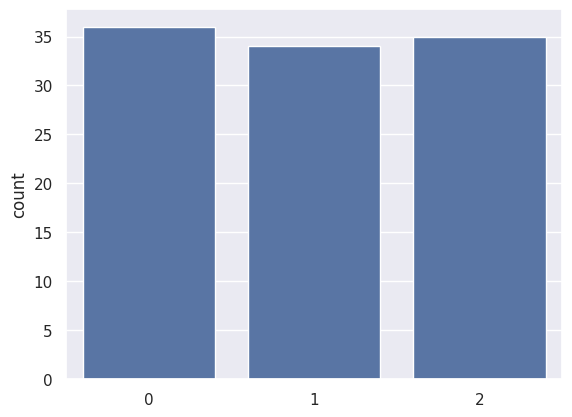

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

sns.countplot(x = y_train)
plt.show()

# Stratify 옵션 활용하기

In [ ]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(
    # X : feature
    # y : target
    X,
    y,
    test_size = 0.3,
    random_state = 121,
    stratify=y # 정수, 문자열와 같은 카테고리화 데이터만 지정이 가능
)

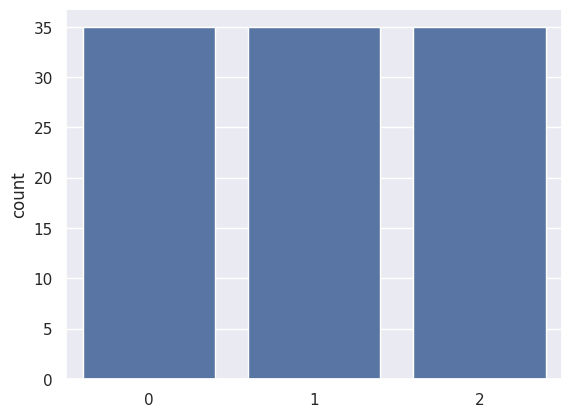

In [ ]:
sns.countplot(x = y_train)
plt.show()

# K-Fold, Stratified K-Fold

In [ ]:
# K-Fold
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
# K-Fold
from sklearn.model_selection import KFold
import numpy as np

# 3개의 폴드 세트로 분리하는 KFold 객체 생성
# 3번을 교차 검증하는 것.
# 전체 데이터         검증1
# 전체 데이터     검증2
# 전체 데이터 검증3
kfold = KFold(n_splits=3)

# KFold 객체의 split() 함수를 호출하면 폴드 별 학습용, 검증용 테스트의 인덱스를 array로 반환
for train_indices, valid_indices in kfold.split(X):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print("훈련 세트의 인덱스 : {}".format(train_indices))
  print()

검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
훈련 세트의 인덱스 : [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

검증 세트의 인덱스 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
훈련 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 

In [ ]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열 -> KFold가 3개이므로 3개가 만들어짐.

kfold = KFold(n_splits=3)

for train_indices, valid_indices in kfold.split(X):

  # 반환된 인덱스를 이용해 학습용(train), 검증용(vaild) 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과 : 0.0


In [ ]:
# Stratified K Fold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)

# y에 들어있는 값을 기준으로 계층적 분할을 한다.
# y값을 기준으로 train과 valid 데이터를 분할한다.
for train_indices, valid_indices in skfold.split(X, y):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print()

  class_, counts = np.unique(y[valid_indices], return_counts=True)
  classes = dict(zip(class_, counts))
  print("클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개".format(classes[0], classes[1], classes[2]))
  print("="*50)
  print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



## Stratified K Fold 교차검증

In [ ]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9400
3 번째 폴드에 대한 평가 결과 : 0.9600

최종 결과 : 0.96


# cross_val_score
K-Fold 클래스를 이용한 교차 검증 방법을 간편화 한 사이킷런의 검증 함수

폴드 세트 추출, 학습/예측, 평가를 한번에 수행할 수 있다.

- estimator : 모델
- X : feature
- y : target
- scoring : 예측 성능 평가 방식
- cv : 폴드의 개수

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(), # Classifier가 들어가면 자동으로 Stratified KFold를 사용.
    X, #feature
    y, #target
    scoring='accuracy', # 성능 측정 방식. 여기서는 정확도를 사용
    cv=3 # 폴드의 개수
)
print("폴드 별 정확도 확인 : {}".format(scores))
print("평균 정확도 확인 : {}".format(np.mean(scores)))

폴드 별 정확도 확인 : [0.98 0.92 0.98]
평균 정확도 확인 : 0.96


# GridSearchCV
사이킷런은 GridSearchCV를 이용해 분류, 회귀 모델 알고리즘에
사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있다.

*   하이퍼 파라미터란?
*   머신러닝의 개별적인 모델에 입력해야 하는 값을 의미한다.
*   즉 모델이 학습하는 값이 아닌 개발자가 직접 넣어줘야 하는 값을 지칭한다.
*   하이퍼 파라미터에 의해 모델의 성능이 조절되기 때문에 모델 알고리즘의 최적 튜닝을 할 수 있다.
*   즉, 모델 복잡도를 하이퍼 파라미터 조정을 통해 조절할 수 있다.




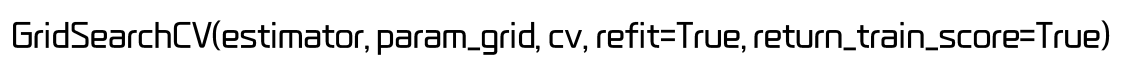

- estimator : 모델
- param_grid : 하이퍼 파라미터의 목록이 들어있는 딕셔너리, 여러 개의 딕셔너리를 이용할 수도 있다.
- cv : 폴드의 개수
- refit : True로 설정하면 가장 좋은 파라미터 설정으로 재학습 시킨다.
- return_train_score : 훈련 결과 점수를 확인할 수 있다.

In [ ]:
# 모델에 사용할 하이퍼 파라미터 딕셔너리
parameters = {
    "max_depth": [1, 2, 3], #decisiontree의 대표적 변수
    "min_samples_split": [2, 3] #max와 min split 조합이 6개 만들어짐 -> 모델 6개 만들어짐
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_dt_clf = GridSearchCV(        # grid_dt_clf 자체가 모델이 됨.
    DecisionTreeClassifier(),
    param_grid=parameters,
    return_train_score=True,
    cv=3, # 각 하이퍼 마라미터 조합으로 만드는 모델에서 사용할 폴드의 개수
    n_jobs = -1 # 사용 가능한 CPU 코어 개수 지정. -1 : 모든 cpu 사용
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = y,
    random_state = 121
)

In [ ]:
# 총 18개의 모델이 생성
# 원래 6개의 모델이 생성되는데, 모델을 하나 생성할 때마다 cv=3의 조건을 두어 한 모델 당 총 3개의
# 하이퍼파라미터 즉 모델이 생성되므로, 총 18개의 모델이 생성됨.
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [ ]:
# GridSearchCV 결과는 cv_results_ 변수에 들어있다.
grid_dt_clf.cv_results_

{'mean_fit_time': array([0.00181858, 0.00593122, 0.00490506, 0.00107598, 0.00104268,
        0.0009915 ]),
 'std_fit_time': array([2.61433869e-04, 4.18550356e-03, 4.73773577e-03, 2.98248841e-05,
        5.11474384e-06, 1.41457225e-05]),
 'mean_score_time': array([0.00118017, 0.00751853, 0.00187389, 0.00081722, 0.0008045 ,
        0.0007809 ]),
 'std_score_time': array([1.16410298e-04, 5.96663177e-03, 9.67202112e-04, 1.28898021e-05,
        2.64650589e-05, 3.79699001e-05]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

## 성능 평가하기
- 각 파라미터 설정에 따른 모델들의 성능을 DataFrame 표로 한번에 확인하기
- 그 중, 가장 성능이 좋은 모델을 찾을 수 있다.
- grid_dt_clf.best_params_ : 최고의 하이퍼 파라미터 찾기
- grid_dt_clf.best_score_ : vaild 데이터에서 최고의 정확도 찾기

In [ ]:
import pandas as pd
pd.DataFrame(grid_dt_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001819,0.000261,0.001180,0.000116,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
1,0.005931,0.004186,0.007519,0.005967,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
2,0.004905,0.004738,0.001874,0.000967,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
3,0.001076,0.000030,0.000817,0.000013,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
4,0.001043,0.000005,0.000805,0.000026,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785
5,0.000992,0.000014,0.000781,0.000038,3,3,"{'max_depth': 3, 'min_samples_split': 3}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785


In [ ]:
print("GridSearchCV 최적 하이퍼 파라미터 : {}".format(grid_dt_clf.best_params_))
print("GridSearchCV 최고 정확도 : {:.4f}".format(grid_dt_clf.best_score_)) # valid 세트에서의 최고 정확도

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9333


In [ ]:

# 최고의 결과를 냈었던 추정기(Estimator)로 예측
pred = grid_dt_clf.predict(X_test)

print("테스트 세트의 정확도 : {:.4f}".format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 0.9667


In [ ]:
# 학습이 오나료된 최고 성능의 모델 객체 얻어내기

best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [ ]:
# 최고의 결과를 냈었던 추정기(Estimator)로 예측
pred = grid_dt_clf.predict(X_test)

print("테스트 세트의 정확도 : {:.4f}".format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 0.9667
